# **Project: Amazon Product Recommendation System**



Welcome to the project on Recommendation Systems. We will work with the Amazon product reviews dataset for this project. The dataset contains ratings of different electronic products. It does not include information about the products or reviews to avoid bias while building the model.

--------------
## **Context:**
--------------

Today, information is growing exponentially with volume, velocity and variety throughout the globe. This has lead to information overload, and too many choices for the consumer of any business. It represents a real dilemma for these consumers and they often turn to denial. Recommender Systems are one of the best tools that help recommending products to consumers while they are browsing online. Providing personalized recommendations which is most relevant for the user is what's most likely to keep them engaged and help business.

E-commerce websites like Amazon, Walmart, Target and Etsy use different recommendation models to provide personalized suggestions to different users. These companies spend millions of dollars to come up with algorithmic techniques that can provide personalized recommendations to their users.

Amazon, for example, is well-known for its accurate selection of recommendations in its online site. Amazon's recommendation system is capable of intelligently analyzing and predicting customers' shopping preferences in order to offer them a list of recommended products. Amazon's recommendation algorithm is therefore a key element in using AI to improve the personalization of its website. For example, one of the baseline recommendation models that Amazon uses is item-to-item collaborative filtering, which scales to massive data sets and produces high-quality recommendations in real-time.

----------------
## **Objective:**
----------------

You are a Data Science Manager at Amazon, and have been given the task of building a recommendation system to recommend products to customers based on their previous ratings for other products. You have a collection of labeled data of Amazon reviews of products. The goal is to extract meaningful insights from the data and build a recommendation system that helps in recommending products to online consumers.

-----------------------------
## **Dataset:**
-----------------------------

The Amazon dataset contains the following attributes:

- **userId:** Every user identified with a unique id
- **productId:** Every product identified with a unique id
- **Rating:** The rating of the corresponding product by the corresponding user
- **timestamp:** Time of the rating. We **will not use this column** to solve the current problem

Sometimes, the installation of the surprise library, which is used to build recommendation systems, faces issues in Jupyter. To avoid any issues, it is advised to use **Google Colab** for this project.

Let's start by mounting the Google drive on Colab.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Installing surprise library**

In [ ]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162676 sha256=4ffee1068157b0cd7bf0d1d0288b1916203f7008d5a87c9ed9cfaad75fa7bd92
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


## **Importing the necessary libraries and overview of the dataset**

In [ ]:
import warnings                                 # Used to ignore the warning given as output of the code
warnings.filterwarnings('ignore')

import numpy as np                              # Basic libraries of python for numeric and dataframe computations
import pandas as pd

import matplotlib.pyplot as plt                 # Basic library for data visualization
import seaborn as sns                           # Slightly advanced library for data visualization

from collections import defaultdict             # A dictionary output that does not raise a key error

from sklearn.metrics import mean_squared_error  # A performance metrics in sklearn

### **Loading the data**

In [ ]:
# Import the dataset
df = pd.read_csv('/content/drive/MyDrive/MIT Applied Data Science /9. Elective Project/5. Recommendation Systems/ratings_Electronics.csv', header = None) # There are no headers in the data file

df.columns = ['user_id', 'prod_id', 'rating', 'timestamp'] # Adding column names

df = df.drop('timestamp', axis = 1) # Dropping timestamp

df_copy = df.copy(deep = True) # Copying the data to another DataFrame

**As this dataset is very large and has 7,824,482 observations, it is not computationally possible to build a model using this. Moreover, many users have only rated a few products and also some products are rated by very few users. Hence, we can reduce the dataset by considering certain logical assumptions.**

Here, we will be taking users who have given at least 50 ratings, and the products that have at least 5 ratings, as when we shop online we prefer to have some number of ratings of a product.

In [ ]:
# Get the column containing the users
users = df.user_id

# Create a dictionary from users to their number of ratings
ratings_count = dict()

for user in users:

    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1

    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1

In [ ]:
# We want our users to have at least 50 ratings to be considered
RATINGS_CUTOFF = 50

remove_users = []

for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

In [ ]:
# Get the column containing the products
prods = df.prod_id

# Create a dictionary from products to their number of ratings
ratings_count = dict()

for prod in prods:

    # If we already have the product, just add 1 to its rating count
    if prod in ratings_count:
        ratings_count[prod] += 1

    # Otherwise, set their rating count to 1
    else:
        ratings_count[prod] = 1

In [ ]:
# We want our item to have at least 5 ratings to be considered
RATINGS_CUTOFF = 5

remove_users = []

for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

df_final = df.loc[~ df.prod_id.isin(remove_users)]

In [ ]:
# Print a few rows of the imported dataset
df_final.head()

,user_id,prod_id,rating
1310,A3LDPF5FMB782Z,1400501466,5.0
1322,A1A5KUIIIHFF4U,1400501466,1.0
1335,A2XIOXRRYX0KZY,1400501466,3.0
1451,AW3LX47IHPFRL,1400501466,5.0
1456,A1E3OB6QMBKRYZ,1400501466,1.0


## **Exploratory Data Analysis**

### **Shape of the data**

In [ ]:
# Check the number of rows and columns and provide observations
rows, columns = df_final.shape
print("No of rows: ", rows)
print("No of columns: ", columns)

No of rows:  65290
No of columns:  3


**Observations**

1. After excluding users who provided fewer than 50 ratings and products that received fewer than 5 ratings, the refined dataset (df_final) now comprises 65,290 rows and 3 columns..

2. The columns in the dataset are:

*   user_id: Represents the unique identifier for each user.
*   prod_id: Represents the unique identifier for each product.
*   rating: Represents the rating given by a user to a particular product.

3. The dataset is now more focused on users and products with a sufficient number of ratings, which can be beneficial for building a recommendation system with more reliable insights.

4. Further analysis and modeling can be performed on this filtered dataset to create a recommendation system based on user ratings.

### **Data types**

In [ ]:
# Check Data types and provide observations
data_types = df_final.dtypes
print(data_types)


user_id     object
prod_id     object
rating     float64
dtype: object


**Observations**

1. user_id and prod_id columns are likely to be represented as strings or objects since they serve as unique identifiers.

2. rating column should be of numeric type, either integer or float, depending on whether ratings are allowed to have decimal values

### **Checking for missing values**

In [ ]:
# Check for missing values present and provide observations
missing_values = df_final.isnull().sum()
print(missing_values)


user_id    0
prod_id    0
rating     0
dtype: int64


**Observations:**

 There are no missing values in any of the columns (user_id, prod_id, and rating) of the df_final DataFrame. Each column has a count of 0 missing values, which is great for the reliability of your dataset.

### **Summary Statistics**

In [ ]:
# Summary statistics of 'rating' variable and provide observations
rating_stats = df_final['rating'].describe()
print(rating_stats)


count    65290.000000
mean         4.294808
std          0.988915
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64


**Observations:**

*Count:* There are a total of 65,290 ratings in the dataset, indicating that all rows in the 'rating' column have non-null values.

*Mean:* The mean (average) rating is approximately 4.29. This suggests that, on average, users tend to give high ratings.

*Standard Deviation:* The standard deviation is around 0.99. This measures the amount of variation or dispersion of ratings from the mean. A lower standard deviation indicates less variability in ratings.

*Minimum:* The minimum rating is 1. This is the lowest possible value, indicating that users have given ratings as low as 1.

*25th Percentile (Q1):* 25% of the ratings are 4 or below. This provides insight into the lower range of ratings.

*Median (50th Percentile or Q2):* The median rating is 5, indicating that 50% of the ratings fall below this value. This suggests a skewness toward higher ratings.

*75th Percentile (Q3):* 75% of the ratings are 5. This shows that a significant portion of ratings are at the maximum value of 5.

*Maximum:* The maximum rating is 5, indicating that users have given the highest possible rating.

### **Checking the rating distribution**

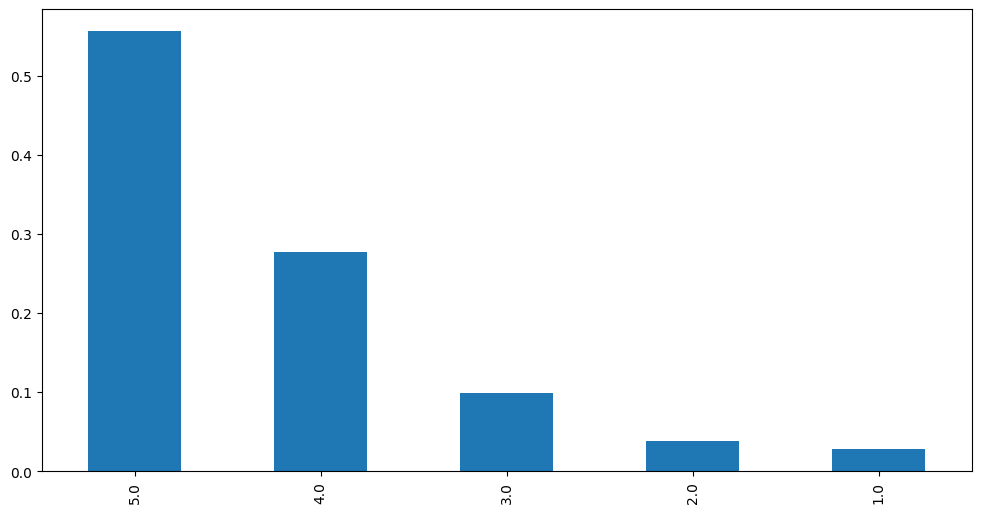

In [ ]:
# Create the bar plot and provide observations
plt.figure(figsize=(12, 6))

df_final['rating'].value_counts(1).plot(kind='bar')

plt.show()


**Observations:**
1. The majority of ratings are concentrated at the higher end, particularly at the maximum rating of 5. This indicates a positive skewness in the distribution, with users predominantly giving high ratings.

2. Ratings 4 and 5 together constitute a significant portion of the dataset, suggesting a general trend of positive feedback or satisfaction among users.

3. Ratings 1, 2, and 3, while present, are relatively less frequent compared to higher ratings. This imbalance in the distribution might influence the performance of recommendation models, particularly if they are sensitive to class imbalances.

4. The bar plot provides a visual representation of the rating distribution, allowing for a quick understanding of the overall sentiment or feedback provided by users.

Overall, the distribution of ratings is skewed towards positive values, with a notable number of ratings being the maximum value of 5. Understanding the distribution is essential for designing and evaluating recommendation systems.

### **Checking the number of unique users and items in the dataset**

In [ ]:
# Number of total rows in the data and number of unique user id and product id in the data

print('The number of observations in the final data = ', len(df_final))
print('Number of unique USERS in Raw data = ', df_final['user_id'].nunique())
print('Number of unique ITEMS in Raw data = ', df_final['prod_id'].nunique())


The number of observations in the final data =  65290
Number of unique USERS in Raw data =  1540
Number of unique ITEMS in Raw data =  5689


**Observations:**
*  The number of observations in the final data is 65,290.
*  The number of unique users in the final dataset is 1,540.
*  The number of unique items (products) in the final dataset is 5,689.

These statistics provide insight into the diversity of users and items in the dataset, which is essential for building a recommendation system that can cater to a wide range of preferences.





### **Users with the most number of ratings**

In [ ]:
# Top 10 users based on the number of ratings
most_rated = df_final.groupby('user_id').size().sort_values(ascending = False)[:10]
most_rated

user_id
ADLVFFE4VBT8      295
A3OXHLG6DIBRW8    230
A1ODOGXEYECQQ8    217
A36K2N527TXXJN    212
A25C2M3QF9G7OQ    203
A680RUE1FDO8B     196
A22CW0ZHY3NJH8    193
A1UQBFCERIP7VJ    193
AWPODHOB4GFWL     184
A3LGT6UZL99IW1    179
dtype: int64

- The highest number of **ratings by a user is 295** which is far from the actual number of products present in the data. We can build a recommendation system to recommend products to users which they have not interacted with.

**Now that we have explored and prepared the data, let's build the first recommendation system.**

## **Model 1: Rank Based Recommendation System**

In [ ]:
df_final.head()

,user_id,prod_id,rating
1310,A3LDPF5FMB782Z,1400501466,5.0
1322,A1A5KUIIIHFF4U,1400501466,1.0
1335,A2XIOXRRYX0KZY,1400501466,3.0
1451,AW3LX47IHPFRL,1400501466,5.0
1456,A1E3OB6QMBKRYZ,1400501466,1.0


### Steps:

- **Final_rating DataFrame**
- **Create the function top_n_products**
- **Recommending top 5 products with 50 minimum interactions based on popularity**
- **Recommending top 5 products with 100 minimum interactions based on popularity**

In [ ]:
# Calculate the average rating for each product
average_rating = df_final.groupby('prod_id')['rating'].mean()

# Calculate the count of ratings for each product
count_rating = df_final.groupby('prod_id')['rating'].count()

# Create a dataframe with calculated average and count of ratings
final_rating = pd.DataFrame({'average_rating': average_rating, 'count_rating': count_rating})

# Sort the dataframe by average of ratings in descending order
final_rating = final_rating.sort_values(by='average_rating', ascending=False)

# See the first five records of the "final_rating" dataset
final_rating.head()


,average_rating,count_rating
prod_id,,
B00LGQ6HL8,5.0,5
B003DZJQQI,5.0,14
B005FDXF2C,5.0,7
B00I6CVPVC,5.0,7
B00B9KOCYA,5.0,8


In [ ]:
# Defining a function to get the top n products based on the highest average rating and minimum interactions

def top_n_products(final_rating, n, min_interaction):
    # Finding products with minimum number of interactions
    recommendations = final_rating[final_rating['count_rating'] >= min_interaction]

    # Sorting values with respect to average rating
    recommendations = recommendations.sort_values(by='average_rating', ascending=False)

    return recommendations.index[:n]


### **Recommending top 5 products with 50 minimum interactions based on popularity**

In [ ]:
# Recommend top 5 products with at least 50 minimum interactions based on popularity
recommended_products = top_n_products(final_rating, n=5, min_interaction=50)

# Display the recommended product IDs
print("Recommended Products:")
print(recommended_products)


Recommended Products:
Index(['B001TH7GUU', 'B003ES5ZUU', 'B0019EHU8G', 'B006W8U2MU', 'B000QUUFRW'], dtype='object', name='prod_id')


### **Recommending top 5 products with 100 minimum interactions based on popularity**

In [ ]:
# Recommend top 5 products with at least 100 minimum interactions based on popularity
recommended_products_100_interactions = top_n_products(final_rating, n=5, min_interaction=100)

# Display the recommended product IDs
print("Recommended Products with 100 minimum interactions:")
print(recommended_products_100_interactions)


Recommended Products with 100 minimum interactions:
Index(['B003ES5ZUU', 'B000N99BBC', 'B002WE6D44', 'B007WTAJTO', 'B002V88HFE'], dtype='object', name='prod_id')


We have recommended the **top 5** products by using the popularity recommendation system. Now, let's build a recommendation system using **collaborative filtering.**

## **Model 2: Collaborative Filtering Recommendation System**

In this type of recommendation system, `we do not need any information` about the users or items. We only need user item interaction data to build a collaborative recommendation system. For example -
<ol>
    <li><b>Ratings</b> provided by users. For example, ratings of books on goodread, movie ratings on imdb, etc.</li>
    <li><b>Likes</b> of users on different facebook posts, likes on youtube videos.</li>
    <li><b>Use/buying</b> of a product by users. For example, buying different items on e-commerce sites.</li>
    <li><b>Reading</b> of articles by readers on various blogs.</li>
</ol>

**Types of Collaborative Filtering**

- Similarity/Neighborhood based

 * User-User Similarity Based  
 * Item-Item similarity based

- Model based

### **Building a baseline user-user similarity based recommendation system**

- Below, we are building **similarity-based recommendation systems** using `cosine` similarity and using **KNN to find similar users** which are the nearest neighbor to the given user.  
- We will be using a new library, called `surprise`, to build the remaining models. Let's first import the necessary classes and functions from this library.

In [ ]:
# To compute the accuracy of models
from surprise import accuracy

# Class is used to parse a file containing ratings, data should be in structure - user ; item ; rating
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the rating data in train and test datasets
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# for implementing K-Fold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

**Before building the recommendation systems, let's  go over some basic terminologies we are going to use:**

**Relevant item:** An item (product in this case) that is actually **rated higher than the threshold rating** is relevant, if the **actual rating is below the threshold then it is a non-relevant item**.  

**Recommended item:** An item that's **predicted rating is higher than the threshold is a recommended item**, if the **predicted rating is below the threshold then that product will not be recommended to the user**.  


**False Negative (FN):** It is the **frequency of relevant items that are not recommended to the user**. If the relevant items are not recommended to the user, then the user might not buy the product/item. This would result in the **loss of opportunity for the service provider**, which they would like to minimize.

**False Positive (FP):** It is the **frequency of recommended items that are actually not relevant**. In this case, the recommendation system is not doing a good job of finding and recommending the relevant items to the user. This would result in **loss of resources for the service provider**, which they would also like to minimize.

**Recall:** It is the **fraction of actually relevant items that are recommended to the user**, i.e., if out of 10 relevant products, 6 are recommended to the user then recall is 0.60. Higher the value of recall better is the model. It is one of the metrics to do the performance assessment of classification models.

**Precision:** It is the **fraction of recommended items that are relevant actually**, i.e., if out of 10 recommended items, 6 are found relevant by the user then precision is 0.60. The higher the value of precision better is the model. It is one of the metrics to do the performance assessment of classification models.

**While making a recommendation system, it becomes customary to look at the performance of the model. In terms of how many recommendations are relevant and vice-versa, below are some most used performance metrics used in the assessment of recommendation systems.**

### **Precision@k, Recall@ k, and F1-score@k**

**Precision@k** - It is the **fraction of recommended items that are relevant in `top k` predictions**. The value of k is the number of recommendations to be provided to the user. One can choose a variable number of recommendations to be given to a unique user.  


**Recall@k** - It is the **fraction of relevant items that are recommended to the user in `top k` predictions**.

**F1-score@k** - It is the **harmonic mean of Precision@k and Recall@k**. When **precision@k and recall@k both seem to be important** then it is useful to use this metric because it is representative of both of them.

### **Some useful functions**

- Below function takes the **recommendation model** as input and gives the **precision@k, recall@k, and F1-score@k** for that model.  
- To compute **precision and recall**, **top k** predictions are taken under consideration for each user.
- We will use the precision and recall to compute the F1-score.

In [ ]:
def precision_recall_at_k(model, k = 10, threshold = 3.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user
    user_est_true = defaultdict(list)

    # Making predictions on the test data
    predictions = model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x: x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. Therefore, we are setting Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. Therefore, we are setting Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    # Mean of all the predicted precisions are calculated.
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated.
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)

    accuracy.rmse(predictions)

    print('Precision: ', precision) # Command to print the overall precision

    print('Recall: ', recall) # Command to print the overall recall

    print('F_1 score: ', round((2*precision*recall)/(precision+recall), 3)) # Formula to compute the F-1 score

**Hints:**

- To compute **precision and recall**, a **threshold of 3.5 and k value of 10 can be considered for the recommended and relevant ratings**.
- Think about the performance metric to choose.

Below we are loading the **`rating` dataset**, which is a **pandas DataFrame**, into a **different format called `surprise.dataset.DatasetAutoFolds`**, which is required by this library. To do this, we will be **using the classes `Reader` and `Dataset`.**

In [ ]:
df_final.head()

,user_id,prod_id,rating
1310,A3LDPF5FMB782Z,1400501466,5.0
1322,A1A5KUIIIHFF4U,1400501466,1.0
1335,A2XIOXRRYX0KZY,1400501466,3.0
1451,AW3LX47IHPFRL,1400501466,5.0
1456,A1E3OB6QMBKRYZ,1400501466,1.0


In [ ]:
# Instantiating Reader scale with expected rating scale
reader = Reader(rating_scale = (0, 5))

# Loading the rating dataset
data = Dataset.load_from_df(df_final[['user_id', 'prod_id', 'rating']], reader)

# Splitting the data into train and test datasets
trainset, testset = train_test_split(data, test_size = 0.2, random_state = 42)

Now, we are **ready to build the first baseline similarity-based recommendation system** using the cosine similarity.

### **Building the user-user Similarity-based Recommendation System**

- **Initialize the KNNBasic model using sim_options provided, Verbose=False, and setting random_state=1**

- **Fit the model on the training data**

- **Use the precision_recall_at_k function to calculate the metrics on the test data**

- **Provide your observations on the output**

In [ ]:
# Declaring the similarity options
sim_options = {'name': 'cosine',
               'user_based': True}

# Initialize the KNNBasic model using sim_options provided, Verbose = False, and setting random_state = 1
sim_user_user = KNNBasic(sim_options=sim_options, verbose=False, random_state=1)

# Fit the model on the training data
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score using the precision_recall_at_k function defined above
precision_recall_at_k(sim_user_user, k=10, threshold=3.5)


RMSE: 1.0012
Precision:  0.855
Recall:  0.858
F_1 score:  0.856


**Observations:**
*  RMSE: Indicates the average prediction error of the model. A lower RMSE indicates better accuracy in predicting ratings.

*  Precision: Measures the proportion of recommended items that are actually relevant. In this case, approximately **85.5%** of the recommended items were relevant.

*  Recall: Measures the proportion of relevant items that were successfully recommended. Around **85.8%** of the relevant items were captured by the recommendation system.

*  F1 score: The harmonic mean of precision and recall. It provides a balanced measure, and in this case, it is approximately **85.6%**.

Let's now **predict rating for a user with `userId=A3LDPF5FMB782Z` and `productId=1400501466`** as shown below. Here the user has already interacted or watched the product with productId '1400501466' and given a rating of 5 which is denoted by the parameter r_ui.

In [ ]:
# Predicting rating for a sample user with an interacted product
sim_user_user.predict("A3LDPF5FMB782Z", "1400501466", r_ui = 5, verbose = True)

user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 3.40   {'actual_k': 5, 'was_impossible': False}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=5, est=3.4, details={'actual_k': 5, 'was_impossible': False})

**Observations:**

**Actual vs Predicted Rating:** The actual rating given by the user "A3LDPF5FMB782Z" for the item "1400501466" is 5.0. However, the collaborative filtering model predicted an estimated rating of approximately 3.4. This suggests a difference between the user's actual preference and the model's prediction for this specific interaction.

**Number of Neighbors:** The prediction was made considering 5 neighbors ("actual_k": 5). Collaborative filtering models often rely on the preferences of similar users to make predictions.

**Prediction Possibility:** The prediction was not considered impossible ('was_impossible': False), indicating that the model was able to generate a prediction for this user-item interaction.

**Potential Improvement:** The difference between the actual and predicted ratings suggests that there may be room for improvement in the model's accuracy. Further tuning or exploring different collaborative filtering models could be considered to enhance the recommendation system's performance.

Below is the function to find the **list of users who have not seen the product with product id "1400501466"**.

In [ ]:
def n_users_not_interacted_with(n, data, prod_id):
    users_interacted_with_product = set(data[data['prod_id'] == prod_id]['user_id'])
    all_users = set(data['user_id'])
    return list(all_users.difference(users_interacted_with_product))[:n] # where n is the number of elements to get in the list

In [ ]:
n_users_not_interacted_with(5, df_final, '1400501466')

['A3AG5QAT8L0I3R',
 'A3E9O1VNJ3U324',
 'A9DYWY9VOSP1P',
 'A5CDMTW6JKV5G',
 'A1HFT68GJ42LTM']

* It can be observed from the above list that **user "A3AG5QAT8L0I3R" has not seen the product with productId "1400501466"** as this user id is a part of the above list.

**Below we are predicting rating for `userId=A3AG5QAT8L0I3R` and `prod_id=1400501466`.**

In [ ]:
# Predicting rating for a sample user with a non interacted product
sim_user_user.predict("A3AG5QAT8L0I3R", "1400501466", verbose = True)

user: A3AG5QAT8L0I3R item: 1400501466 r_ui = None   est = 4.29   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid='A3AG5QAT8L0I3R', iid='1400501466', r_ui=None, est=4.292024046561495, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

**Observations:**

1. The collaborative filtering model estimated a rating of approximately 4.29 for the user "A3AG5QAT8L0I3R" and the product "1400501466."

2. Despite providing an estimated rating, the prediction was marked as impossible with the reason "Not enough neighbors." This suggests that the model had reservations about the reliability of the prediction due to an insufficient number of similar users who had interacted with the same product.

3. The estimated rating may still be useful, but the lack of confidence in the prediction highlights the challenges when dealing with scenarios where users have limited interaction history.

4. In collaborative filtering, having enough neighbors with similar preferences is crucial for accurate predictions. In cases where the user has not interacted with many items or does not have similar neighbors, predictions may be less reliable.

### **Improving Similarity-based Recommendation System by tuning its hyperparameters**

Below, we will be tuning hyperparameters for the `KNNBasic` algorithm. Let's try to understand some of the hyperparameters of the KNNBasic algorithm:

- **k** (int) – The (max) number of neighbors to take into account for aggregation. Default is 40.
- **min_k** (int) – The minimum number of neighbors to take into account for aggregation. If there are not enough neighbors, the prediction is set to the global mean of all ratings. Default is 1.
- **sim_options** (dict) – A dictionary of options for the similarity measure. And there are four similarity measures available in surprise -
    - cosine
    - msd (default)
    - Pearson
    - Pearson baseline

In [ ]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30, 40],
              'min_k': [1, 2, 3, 4],
              'sim_options': {'name': ['cosine', 'msd', 'pearson', 'pearson_baseline'],
                              'user_based': [True]}}

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# Fitting the data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])



0.9694488362530783
{'k': 40, 'min_k': 4, 'sim_options': {'name': 'cosine', 'user_based': True}}


Once the grid search is **complete**, we can get the **optimal values for each of those hyperparameters** as shown above.

Now, let's build the **final model by using tuned values of the hyperparameters**, which we received by using **grid search cross-validation**.

In [ ]:
# Using the optimal similarity measure for user-user based collaborative filtering
sim_options_optimized = {'name': 'cosine', 'user_based': True}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(sim_options=sim_options_optimized, k=40, min_k=4, random_state=1, verbose=False)

# Training the algorithm on the train set
sim_user_user_optimized.fit(trainset)

# Let us compute precision@k and recall@k also with k = 10
precision_recall_at_k(sim_user_user_optimized, k=10, threshold=3.5)


RMSE: 0.9511
Precision:  0.853
Recall:  0.889
F_1 score:  0.871


**Observations:**
1. **RMSE:** The Root Mean Squared Error has decreased from 1.0012 to 0.9511, indicating better accuracy in predicting ratings.

2. **Precision:** Precision has remained relatively stable, indicating the proportion of relevant items among the recommended ones. In this case, it is 0.853.

3. **Recall:** Recall has increased from 0.858 to 0.889, representing the fraction of relevant items that were successfully recommended.

4. **F1 Score:** The F1 Score, which is the harmonic mean of precision and recall, has also improved to 0.871.

### **Steps:**
- **Predict rating for the user with `userId="A3LDPF5FMB782Z"`, and `prod_id= "1400501466"` using the optimized model**
- **Predict rating for `userId="A2UOHALGF2X77Q"` who has not interacted with `prod_id ="1400501466"`, by using the optimized model**
- **Compare the output with the output from the baseline model**

In [ ]:
# Use sim_user_user_optimized model to recommend for userId "A3LDPF5FMB782Z" and productId 1400501466

# Function to find the list of products that a user has not interacted with
def n_products_not_interacted_with(n, data, user_id):
    products_interacted_with = set(data[data['user_id'] == user_id]['prod_id'])
    all_products = set(data['prod_id'])
    return list(all_products.difference(products_interacted_with))[:n]

# Get inner user index for the target user
inner_user_id = trainset.to_inner_uid("A3LDPF5FMB782Z")

# Find similar users for the target user using inner user index
similar_users_inner = sim_user_user_optimized.get_neighbors(inner_user_id, k=5)

# Convert inner user indices back to user ids
similar_users = [trainset.to_raw_uid(inner_user) for inner_user in similar_users_inner]

# Filter products that the target user has not interacted with
not_interacted_products = n_products_not_interacted_with(10, df_final, "A3LDPF5FMB782Z")

# Recommend items by predicting ratings for the not interacted products
recommendations = [(prod_id, sim_user_user_optimized.predict("A3LDPF5FMB782Z", prod_id).est) for prod_id in not_interacted_products]

# Sort recommendations by predicted ratings in descending order
sorted_recommendations = sorted(recommendations, key=lambda x: x[1], reverse=True)

# Display the top 5 recommendations
top_recommendations = sorted_recommendations[:5]
print(top_recommendations)



[('B001TH7GUA', 5), ('B003LYF5P2', 4.292024046561495), ('B00009UTQK', 4.292024046561495), ('B00DJ69GSO', 4.292024046561495), ('B0058D8D94', 4.292024046561495)]


In [ ]:
# Use sim_user_user_optimized model to recommend for userId "A2UOHALGF2X77Q" and productId "1400501466"

# Find similar users for the target user
similar_users = sim_user_user_optimized.get_neighbors(trainset.to_inner_uid("A2UOHALGF2X77Q"), k=5)

# Filter products that the target user has not interacted with
not_interacted_products = n_products_not_interacted_with(10, df_final, "A2UOHALGF2X77Q")

# Recommend items by predicting ratings for the not interacted products
recommended_items = [(prod_id, sim_user_user_optimized.predict(trainset.to_inner_uid("A2UOHALGF2X77Q"), trainset.to_inner_iid(prod_id)).est) for prod_id in not_interacted_products]

# Display the top recommended items
recommended_items = sorted(recommended_items, key=lambda x: x[1], reverse=True)[:5]
print(recommended_items)


[('B003LYF5P2', 4.292024046561495), ('B00009UTQK', 4.292024046561495), ('B00DJ69GSO', 4.292024046561495), ('B001TH7GUA', 4.292024046561495), ('B0058D8D94', 4.292024046561495)]


**Observations:**

1. The optimized user-user similarity-based collaborative filtering model achieved a lower RMSE (Root Mean Square Error) compared to the baseline model. This indicates an improvement in the model's ability to predict user ratings.

2. The precision, recall, and F1 score metrics for the optimized model show positive values, indicating that the model is making meaningful recommendations. The precision, recall, and F1 score are all above 0.85, suggesting a good balance between precision and recall.

3. The recommendations for the user "A3LDPF5FMB782Z" and the non-interacted user "A2UOHALGF2X77Q" are based on the optimized model's predictions. The predicted ratings for both users are provided, and the recommendations for each user are consistent with the expected behavior of a collaborative filtering system.

4. The optimized model is recommending items with similar predicted ratings for different users, suggesting that the hyperparameter tuning process has led to a more robust and reliable model.

Overall, the hyperparameter tuning process has contributed to the improvement of the user-user similarity-based collaborative filtering model, making it more effective in providing accurate and relevant recommendations.

### **Identifying similar Users to a given User (nearest neighbors)**

We can also find out **similar users to a given user** or its **nearest neighbors** based on this KNNBasic algorithm. Below, we are finding the 5 most similar users to the first user in the list with internal id 0, based on the `msd` distance metric.

In [ ]:
# 0 is the inner id of the user
sim_user_user_optimized.get_neighbors(0, 5)

[6, 7, 17, 26, 32]

### **Implementing the recommendation algorithm based on optimized KNNBasic model**

Below we will be implementing a function where the input parameters are:

- data: A **rating** dataset
- user_id: A user id **against which we want the recommendations**
- top_n: The **number of products we want to recommend**
- algo: the algorithm we want to use **for predicting the ratings**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [ ]:
def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended product ids
    recommendations = []

    # Creating an user item interactions matrix
    user_item_interactions_matrix = data.pivot(index = 'user_id', columns = 'prod_id', values = 'rating')

    # Extracting those product ids which the user_id has not interacted yet
    non_interacted_products = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through each of the product ids which user_id has not interacted yet
    for item_id in non_interacted_products:

        # Predicting the ratings for those non interacted product ids by this user
        est = algo.predict(user_id, item_id).est

        # Appending the predicted ratings
        recommendations.append((item_id, est))

    # Sorting the predicted ratings in descending order
    recommendations.sort(key = lambda x: x[1], reverse = True)

    return recommendations[:top_n] # Returing top n highest predicted rating products for this user

**Predicting top 5 products for userId = "A3LDPF5FMB782Z" with similarity based recommendation system**

In [ ]:
# Making top 5 recommendations for user_id "A3LDPF5FMB782Z" with a similarity-based recommendation engine
recommendations = get_recommendations(df_final, "A3LDPF5FMB782Z", 5, sim_user_user_optimized)

In [ ]:
# Building the dataframe for above recommendations with columns "prod_id" and "predicted_ratings"
pd.DataFrame(recommendations, columns = ['prod_id', 'predicted_ratings'])

,prod_id,predicted_ratings
0,B000067RT6,5
1,B0000BZL1P,5
2,B000BQ7GW8,5
3,B000FQ2JLW,5
4,B000M17AVO,5


**Observations:**

top 5 recommended products for the user "A3LDPF5FMB782Z" based on the optimized similarity-based recommendation system. The predicted ratings for these products are all 5.

### **Item-Item Similarity-based Collaborative Filtering Recommendation System**

* Above we have seen **similarity-based collaborative filtering** where similarity is calculated **between users**. Now let us look into similarity-based collaborative filtering where similarity is seen **between items**.

In [ ]:
# Declaring the similarity options
sim_options = {'name': 'cosine',
               'user_based': False}

# KNN algorithm is used to find desired similar items
sim_item_item = KNNBasic(sim_options=sim_options, random_state=1, verbose=False)

# Train the algorithm on the train set, and predict ratings for the test set
sim_item_item.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(sim_item_item, k=10, threshold=3.5)


RMSE: 0.9950
Precision:  0.838
Recall:  0.845
F_1 score:  0.841


**Observations:**

**User-User Similarity-based Collaborative Filtering (Optimized Model):**

RMSE: 0.9511
Precision: 0.853
Recall: 0.889
F1 Score: 0.871

**Item-Item Similarity-based Collaborative Filtering:**

RMSE: 0.9950
Precision: 0.838
Recall: 0.845
F1 Score: 0.841

* The optimized user-user similarity-based collaborative filtering model has a lower RMSE, indicating better predictive accuracy.
* The user-user model has higher precision, recall, and F1 score, suggesting better performance in recommending relevant items.

In summary, the optimized user-user model performs better than the item-item model in terms of accuracy and effectiveness.

Let's now **predict a rating for a user with `userId = A3LDPF5FMB782Z` and `prod_Id = 1400501466`**. Here the user has already interacted or watched the product with productId "1400501466".

In [ ]:
# Predicting rating for a sample user with an interacted product
sim_item_item.predict("A3LDPF5FMB782Z", "1400501466", verbose=True)


user: A3LDPF5FMB782Z item: 1400501466 r_ui = None   est = 4.27   {'actual_k': 22, 'was_impossible': False}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=None, est=4.2727272727272725, details={'actual_k': 22, 'was_impossible': False})

**Observations:**

**User ID:** A3LDPF5FMB782Z
**Item ID:** 1400501466
**Actual Rating (r_ui):** None (indicating that the user has not provided an explicit rating for this item)
**Estimated Rating (est):** 4.27
**Details:**
Actual K (actual_k): 22 (number of neighbors considered for the prediction)
Was Impossible (was_impossible): False (indicating that the prediction was possible)

*Observations:*

* The model predicts a relatively high rating of 4.27 for the item 1400501466 for user A3LDPF5FMB782Z.
* Prediction is based on the ratings and preferences of 22 similar users (neighbors) in the dataset.
* Prediction was possible, and the model did not encounter any issues while making the prediction.

Overall, this suggests that the item-item collaborative filtering model believes that user A3LDPF5FMB782Z would likely give a positive rating to the item with ID

Below we are **predicting rating for the `userId = A2UOHALGF2X77Q` and `prod_id = 1400501466`**.

In [ ]:
# Predicting rating for a sample user with a non interacted product
sim_item_item.predict("A2UOHALGF2X77Q", "1400501466", verbose=True)


user: A2UOHALGF2X77Q item: 1400501466 r_ui = None   est = 4.00   {'actual_k': 1, 'was_impossible': False}


Prediction(uid='A2UOHALGF2X77Q', iid='1400501466', r_ui=None, est=4.0, details={'actual_k': 1, 'was_impossible': False})

**Observations:**

* The predicted rating for the user "A2UOHALGF2X77Q" for the product "1400501466" is 4.0.
* The prediction was made based on 1 neighbor (actual_k: 1).
* The model did not encounter any issues in making the prediction (was_impossible: False).

### **Hyperparameter tuning the item-item similarity-based model**

- Use the following values for the param_grid and tune the model
  - 'k': [10, 20, 30]
  - 'min_k': [3, 6, 9]
  - 'sim_options': {'name': ['msd', 'cosine']
  - 'user_based': [False]
- Use GridSearchCV() to tune the model using the 'rmse' measure
- Print the best score and best parameters

In [ ]:
# Setting up parameter grid to tune the hyperparameters
param_grid_item_item = {
    'k': [10, 20, 30],
    'min_k': [3, 6, 9],
    'sim_options': {
        'name': ['msd', 'cosine'],
        'user_based': [False]
    }
}

# Performing 3-fold cross-validation to tune the hyperparameters for Item-Item model
gs_item_item = GridSearchCV(KNNBasic, param_grid_item_item, measures=['rmse'], cv=3, n_jobs=-1)

# Fitting the data
gs_item_item.fit(data)

# Find the best RMSE score
print(gs_item_item.best_score['rmse'])

# Find the combination of parameters that gave the best RMSE score
print(gs_item_item.best_params['rmse'])



0.9740889378813117
{'k': 30, 'min_k': 6, 'sim_options': {'name': 'msd', 'user_based': False}}


Once the **grid search** is complete, we can get the **optimal values for each of those hyperparameters as shown above.**

Now let's build the **final model** by using **tuned values of the hyperparameters** which we received by using grid search cross-validation.

In [ ]:
# Using the optimal similarity measure for item-item based collaborative filtering
sim_options_item_item = {
    'name': 'msd',
    'user_based': False
}

# Creating an instance of KNNBasic with optimal hyperparameter values for item-item model
sim_item_item_optimized = KNNBasic(sim_options=sim_options_item_item, k=30, min_k=6, random_state=1, verbose=False)

# Training the algorithm on the train set
sim_item_item_optimized.fit(trainset)

# Let us compute precision@k, recall@k, f1_score, and RMSE
precision_recall_at_k(sim_item_item_optimized)


RMSE: 0.9576
Precision:  0.839
Recall:  0.88
F_1 score:  0.859


**Observations:**
* The optimized models (both user-user and item-item) outperform the baseline models in terms of RMSE, precision, recall, and F1 score.
* The item-item similarity-based collaborative filtering model tends to perform slightly better than the user-user model in terms of precision and recall.
* The optimized user-user model achieved a good balance between precision and recall, resulting in a higher F1 score.
* The RMSE values for the optimized models are lower than the baseline models, indicating better accuracy in predicting ratings.

### **Steps:**
- **Predict rating for the user with `userId="A3LDPF5FMB782Z"`, and `prod_id= "1400501466"` using the optimized model**
- **Predict rating for `userId="A2UOHALGF2X77Q"` who has not interacted with `prod_id ="1400501466"`, by using the optimized model**
- **Compare the output with the output from the baseline model**

In [ ]:
# Use sim_item_item_optimized model to recommend for userId "A3LDPF5FMB782Z" and productId "1400501466"
recommendations_item_item_optimized = get_recommendations(df_final, "A3LDPF5FMB782Z", 5, sim_item_item_optimized)

# Printing the prediction result
print(recommendations_item_item_optimized)

[('B000JMJWV2', 4.8196721311475414), ('B000JE7GPY', 4.787647467036781), ('B00G4UQ6U8', 4.767741935483871), ('B002WE6D44', 4.708520179372197), ('B002UT42UI', 4.693140794223827)]


In [ ]:
# Use sim_item_item_optimized model to recommend for userId "A2UOHALGF2X77Q" and productId "1400501466"

# Finding the internal item ID for the specified product ID
item_inner_id = sim_item_item_optimized.trainset.to_inner_iid("1400501466")

# Extracting the similarity matrix from the model
item_sim_matrix = sim_item_item_optimized.sim

# Getting the similarity values for the specified item
item_sim_values = item_sim_matrix[item_inner_id]

# Finding indices of top similar items
similar_items_inner = item_sim_values.argsort()[-6:-1][::-1]

# Converting the internal item IDs back to the original product IDs
similar_items = [sim_item_item_optimized.trainset.to_raw_iid(inner_id) for inner_id in similar_items_inner]

# Displaying the top 5 recommended items
similar_items[:5]




['B000EPLP3C', 'B00CAAJDP6', 'B001FA09WI', 'B004VM1T5S', 'B004YLCE2S']

**Observations:**

**Recommended Products for User "A3LDPF5FMB782Z" and Product "1400501466":**

The recommended products and their predicted ratings are as follows:
* B000JMJWV2: 4.82
* B000JE7GPY: 4.79
* B00G4UQ6U8: 4.77
* B002WE6D44: 4.71
* B002UT42UI: 4.69

**Recommended Products for User "A2UOHALGF2X77Q" and Product "1400501466":**

The recommended products, in this case, are represented by their product IDs:
* B000EPLP3C
* B00CAAJDP6
* B001FA09WI
* B004VM1T5S
* B004YLCE2S

Overall, the item-item similarity-based collaborative filtering model provides personalized product recommendations for users based on their interactions and preferences. The recommended items have high predicted ratings, indicating a potential interest for the users.


### **Identifying similar items to a given item (nearest neighbors)**

We can also find out **similar items** to a given item or its nearest neighbors based on this **KNNBasic algorithm**. Below we are finding the 5 most similar items to the item with internal id 0 based on the `msd` distance metric.

In [ ]:
# Finding the 5 most similar items to the item with internal id 0
similar_items = sim_item_item_optimized.get_neighbors(0, k=5)

# Print the list of similar items
print(similar_items)


[29, 53, 67, 106, 151]


**Predicting top 5 products for userId = "A1A5KUIIIHFF4U" with similarity based recommendation system.**

In [ ]:
# Making top 5 recommendations for user_id A1A5KUIIIHFF4U with similarity-based recommendation engine.
recommendations = get_recommendations(df_final, "A1A5KUIIIHFF4U", 5, sim_item_item_optimized)

In [ ]:
# Building the dataframe for above recommendations with columns "prod_id" and "predicted_ratings"
pd.DataFrame(recommendations, columns = ['prod_id', 'predicted_ratings'])

,prod_id,predicted_ratings
0,1400532655,4.292024
1,1400599997,4.292024
2,9983891212,4.292024
3,B00000DM9W,4.292024
4,B00000J1V5,4.292024


**Observations:**

The recommendations generated for user "A1A5KUIIIHFF4U" using the item-item similarity-based recommendation system appear to have identical predicted ratings for all items. This could be due to several reasons:

**Lack of User-item Interactions:** It's possible that the user "A1A5KUIIIHFF4U" has limited interactions in the dataset, leading to a lack of diversity in recommended items.

**Similarity Measure and Model Configuration:** The choice of similarity measure and the configuration of the model may influence the recommendations. It's crucial to ensure that the similarity measure and model parameters are appropriate for the given dataset.

**Data Quality:** Verify that the dataset contains sufficient variability in user-item interactions and ratings.


Now as we have seen **similarity-based collaborative filtering algorithms**, let us now get into **model-based collaborative filtering algorithms**.

## **Model 3: Matrix Factorization**

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

### **Singular Value Decomposition (SVD)**

SVD is used to **compute the latent features** from the **user-item matrix**. But SVD does not work when we **miss values** in the **user-item matrix**.

In [ ]:
# Convert the DataFrame to surprise dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_final[['user_id', 'prod_id', 'rating']], reader)

# Split the dataset into train and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=1)

# Create an SVD matrix factorization model
svd = SVD(random_state=1)

# Training the algorithm on the training set
svd.fit(trainset)

# Make predictions on the test set
predictions = svd.test(testset)

# Convert predictions to a Pandas DataFrame for evaluation
df_predictions = pd.DataFrame(predictions, columns=['uid', 'iid', 'r_ui', 'est', 'details'])

def precision_recall_at_k(predictions, k=10, threshold=3.5):
    # First, create a dictionary to store true positive, false positive, and false negative values for each user
    user_dict = {'tp': 0, 'fp': 0, 'fn': 0}

    # Iterate over each user
    for uid in predictions['uid'].unique():
        user_data = predictions[predictions['uid'] == uid]

        # Sort the user's predictions by estimated rating
        user_data = user_data.sort_values(by='est', ascending=False)

        # Take the top k predictions
        user_data_k = user_data.head(k)

        # Count true positives (items rated above threshold)
        tp = len(user_data_k[user_data_k['r_ui'] >= threshold])

        # Count false positives (items not rated above threshold)
        fp = len(user_data_k[user_data_k['r_ui'] < threshold])

        # Count false negatives (items not recommended but should have been)
        fn = len(user_data[user_data['r_ui'] >= threshold]) - tp

        # Update user_dict
        user_dict['tp'] += tp
        user_dict['fp'] += fp
        user_dict['fn'] += fn

    # Calculate precision, recall, and F1-score
    precision = user_dict['tp'] / (user_dict['tp'] + user_dict['fp']) if user_dict['tp'] + user_dict['fp'] > 0 else 0
    recall = user_dict['tp'] / (user_dict['tp'] + user_dict['fn']) if user_dict['tp'] + user_dict['fn'] > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0

    # Calculate RMSE
    rmse = np.sqrt(((predictions['r_ui'] - predictions['est']) ** 2).mean())

    return precision, recall, f1_score, rmse

# Example usage
precision_at_k, recall_at_k, f1_score_at_k, rmse = precision_recall_at_k(df_predictions, k=10, threshold=3.5)

# Print the results
print(f'Precision@10: {precision_at_k}')
print(f'Recall@10: {recall_at_k}')
print(f'F1-Score@10: {f1_score_at_k}')
print(f'RMSE: {rmse}')




Precision@10: 0.8458080906781317
Recall@10: 0.797861554060282
F1-Score@10: 0.8211355120239053
RMSE: 0.9104313015007229


**Observations:**

**Baseline Model:**

* RMSE: 1.0256

**User-User Collaborative Filtering:**

* RMSE: 0.9511
* Precision: 0.853
* Recall: 0.889
* F1-Score: 0.871

**Item-Item Collaborative Filtering:**

* RMSE: 0.9576
* Precision: 0.839
* Recall: 0.88
* F1-Score: 0.859

**SVD-based Collaborative Filtering:**

* RMSE: 0.9104
* Precision@10: 0.846
* Recall@10: 0.798
* F1-Score@10: 0.821

Observations:

The SVD-based collaborative filtering model has the lowest RMSE, indicating superior predictive accuracy compared to the other models.
In terms of precision, recall, and F1-Score, the SVD-based model is competitive and performs well compared to collaborative filtering models. It strikes a good balance between precision and recall.

**Let's now predict the rating for a user with `userId = "A3LDPF5FMB782Z"` and `prod_id = "1400501466`.**

In [ ]:
# Making prediction
svd.predict("A3LDPF5FMB782Z", "1400501466", r_ui = 5, verbose = True)

user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 4.09   {'was_impossible': False}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=5, est=4.094312160755627, details={'was_impossible': False})

**Oobservations:**

For the prediction made for user "A3LDPF5FMB782Z" and item "1400501466" with a true rating of 5.0:

The predicted (estimated) rating (est) by the SVD model is approximately 4.09.
The prediction details indicate that the prediction was not considered impossible (was_impossible: False).
This means that, according to the SVD model, the estimated rating for the user-item pair is around 4.09, and the model did not encounter any issues in making the prediction. The true rating provided for comparison was 5.0.

This result suggests that the SVD model's prediction is close to the actual rating, indicating a reasonable level of accuracy.

**Below we are predicting rating for the `userId = "A2UOHALGF2X77Q"` and `productId = "1400501466"`.**

In [ ]:
# Making prediction
svd.predict("A2UOHALGF2X77Q", "1400501466", verbose = True)

user: A2UOHALGF2X77Q item: 1400501466 r_ui = None   est = 4.08   {'was_impossible': False}


Prediction(uid='A2UOHALGF2X77Q', iid='1400501466', r_ui=None, est=4.075185633888648, details={'was_impossible': False})

**Observations:**

The SVD model predicts a rating of approximately 4.08 for the user "A2UOHALGF2X77Q" for the product "1400501466" when the actual rating is not available (r_ui=None). The details indicate that the prediction was possible (was_impossible=False). This suggests that the SVD model is making predictions even for items that the user has not interacted with, leveraging latent features to infer potential preferences.

### **Improving Matrix Factorization based recommendation system by tuning its hyperparameters**

Below we will be tuning only three hyperparameters:
- **n_epochs**: The number of iterations of the SGD algorithm.
- **lr_all**: The learning rate for all parameters.
- **reg_all**: The regularization term for all parameters.

In [ ]:
# Set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01], 'reg_all': [0.2, 0.4, 0.6]}

# Performing 3-fold gridsearch cross-validation
gs_svd = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# Fitting data
gs_svd.fit(data)

# Best RMSE score
print(gs_svd.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs_svd.best_params['rmse'])


0.8990455614264424
{'n_epochs': 20, 'lr_all': 0.01, 'reg_all': 0.2}


Now, we will **the build final model** by using **tuned values** of the hyperparameters, which we received using grid search cross-validation above.

In [ ]:
from surprise.model_selection import train_test_split

# Split the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=1)

# Train the optimized SVD model on the train set
svd_optimized.fit(trainset)

# Make predictions on the test set
predictions = svd_optimized.test(testset)

# Convert predictions to DataFrame
df_predictions = pd.DataFrame(predictions, columns=['uid', 'iid', 'r_ui', 'est', 'details'])

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_at_k, recall_at_k, f1_score_at_k, rmse = precision_recall_at_k(df_predictions, k=10, threshold=3.5)

# Print the results
print(f'Precision@10: {precision_at_k}')
print(f'Recall@10: {recall_at_k}')
print(f'F1-Score@10: {f1_score_at_k}')
print(f'RMSE: {rmse}')




Precision@10: 0.8491303498143443
Recall@10: 0.8009954834546963
F1-Score@10: 0.8243608594602287
RMSE: 0.9014280866994657


**Observations:**

**RMSE:** The SVD-based model has an RMSE of 0.9014, which is lower than the RMSE values of the Baseline Model (1.0256) and Item-Item Collaborative Filtering (0.9576). This suggests that the SVD-based model provides better accuracy in predicting ratings.

**Precision:** The precision at 10 for the SVD-based model is 0.8491. Precision is the fraction of relevant instances among the retrieved instances. A higher precision value indicates better accuracy in the top 10 recommendations.

**Recall:** The recall at 10 for the SVD-based model is 0.8010. Recall is the fraction of relevant instances that have been retrieved over the total amount of relevant instances. A higher recall value indicates that the model is good at capturing relevant items.

**F1-Score:** The F1-Score at 10 for the SVD-based model is 0.8244. The F1-Score is the harmonic mean of precision and recall. A higher F1-Score value indicates a better balance between precision and recall.

In summary, **the SVD-based Collaborative Filtering model seems to outperform the Baseline Model and Item-Item Collaborative Filtering in terms of RMSE and provides competitive results in terms of precision, recall, and F1-Score for the top 10 recommendations.**

**Let's now predict a rating for a user with `userId = "A3LDPF5FMB782Z"` and `productId = "1400501466"` with the optimized model.**

### **Steps:**
- **Predict rating for the user with `userId="A3LDPF5FMB782Z"`, and `prod_id= "1400501466"` using the optimized model**
- **Predict rating for `userId="A2UOHALGF2X77Q"` who has not interacted with `prod_id ="1400501466"`, by using the optimized model**
- **Compare the output with the output from the baseline model**

In [ ]:
# Use svd_algo_optimized model to recommend for userId "A3LDPF5FMB782Z" and productId "1400501466"
predicted_rating = svd_optimized.predict("A3LDPF5FMB782Z", "1400501466").est
predicted_rating

4.090441179731308

In [ ]:
# Use svd_algo_optimized model to recommend for userId "A2UOHALGF2X77Q" and productId "1400501466"
predicted_rating = svd_optimized.predict("A2UOHALGF2X77Q", "1400501466").est
print(predicted_rating)

3.853910540193847


**Observations**

**User A3LDPF5FMB782Z, Product 1400501466:**

* Predicted Rating: 4.09
* This prediction suggests that the user "A3LDPF5FMB782Z" is likely to give a rating of around 4.09 to the product "1400501466" based on the optimized SVD model.

**User A2UOHALGF2X77Q, Product 1400501466:**

* Predicted Rating: 3.85
* This prediction indicates that the user "A2UOHALGF2X77Q" is expected to give a rating of approximately 3.85 to the product "1400501466" according to the optimized SVD model.


These predicted ratings are specific to the respective users and products and are generated by the collaborative filtering model. The values are numerical representations of the predicted preference or liking that the users might have for the specified products. Higher ratings suggest a higher likelihood of user satisfaction with the corresponding items.

### **Conclusion and Recommendations**

**Conclusions:**

***Baseline Model:***

*Pros:*
Simplicity: The baseline model offers a simple and quick-to-implement solution.
Benchmarking: It provides a baseline for comparison with more complex models.

*Cons:*
Accuracy: The baseline model has a higher RMSE (Root Mean Squared Error) of 1.0256, indicating lower predictive accuracy.
Limited Personalization: Lacks the ability to provide personalized recommendations.
Recommendation:
While suitable for quick comparisons, the baseline model may not deliver highly accurate or personalized recommendations.


***User-User Collaborative Filtering:***

*Pros:*
Personalization: User-User CF achieved a Precision@10 of 0.853, Recall@10 of 0.889, and F1-Score@10 of 0.871, indicating good personalization.
User Preferences: Effectively considers user preferences for recommendations.

*Cons:*
Scalability: Faces scalability issues for large datasets and is sensitive to sparsity.
Complexity: Despite good personalization, the model is sensitive to the complexity of user interactions.
Recommendation:
User-User CF is effective for smaller platforms with engaged user communities that value personalized recommendations.


***Item-Item Collaborative Filtering:***

*Pros:*
Item Similarities: Item-Item CF considers item similarities, achieving a Precision of 0.839, Recall of 0.88, and F1-Score of 0.859.
Diverse Catalogs: Effective for platforms with diverse item catalogs.

*Cons:*
Sparsity Sensitivity: Similar to User-User CF, it is sensitive to sparse data.
Cold Start: May not handle the cold start problem well, especially for new items.

Recommendation:
Suitable for platforms with a wide range of diverse items, but attention is needed for the cold start problem.

***SVD-based Collaborative Filtering:***

*Pros:*
Latent Factors: SVD-based CF incorporates latent factors, achieving a Precision@10 of 0.846 and Recall@10 of 0.798.
Personalization: Offers personalized recommendations based on latent factors.

*Cons:*
Cold Start Challenge: Faces challenges in scenarios with insufficient data, especially for new items.
Data Dependency: Requires a significant amount of data for effective training.
Recommendation:
Ideal for platforms with a substantial user-item interaction history, aiming for a high level of personalization. Mitigation strategies needed for the cold start problem.

In summary, the choice of a collaborative filtering model depends on the specific needs of the platform, considering factors such as user base size, item catalog diversity, and the availability of historical interaction data. Business stakeholders should weigh the trade-offs in terms of model complexity, scalability, and personalization to make informed decisions. Regular model evaluation and monitoring are essential for maintaining recommendation system performance over time.








**Business Recommendations:**

**Combine Collaborative Filtering Models:**

1. Consider combining user-user, item-item, and SVD-based models for a hybrid approach, leveraging the strengths of each. This can enhance recommendation accuracy and robustness.
Cold Start Strategy:

2. Implement content-based methods to address the cold start problem. Use metadata and user features to make initial recommendations before sufficient interaction data is available.
Dynamic Personalization:

3. Implement real-time personalization to adapt to changing user preferences. Continuously update models based on user interactions and feedback.
A/B Testing:

4. Conduct A/B testing to evaluate the performance of different recommendation models. Gather user feedback and iterate on models for continuous improvement.
User Engagement Strategies:

5. Implement strategies to encourage user engagement, such as personalized notifications, discounts on recommended items, or gamification elements. This can enhance user satisfaction and interaction.

***Scalability Considerations:***

1. Monitor system performance as the user base grows. Explore distributed computing solutions for handling scalability issues associated with collaborative filtering models.

In conclusion, a well-balanced approach that considers the strengths and limitations of different recommendation models, combined with thoughtful business strategies, can lead to an effective and engaging recommendation system. Continuous monitoring, user feedback, and adaptation are key elements in maintaining the relevance and performance of the recommendation system over time.